In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

In [3]:
data = pd.read_csv("Cleaned Data.csv", index_col=0)

In [4]:
data.head()

,Gender,Martial Status,No. of Childs,Education,Work,Pre_code,Post_code,item,department,brand,...,Gross Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Cost Class
0,Female,Single,4,bachelors,professional,H11go,ZA,cleaning supplies,household,red wing,...,28.1997,1.5990,1.0,10,2842.23,2037.640000,481.98,323.000000,602.7575,D
1,Female,Single,3,bachelors,management,S04ne,WA,snack foods,snack foods,nationeel,...,16.5710,1.5990,0.0,50,2814.95,2049.720000,457.36,328.464616,708.6650,E
2,Male,Married,2,high,manual,L05es,CA,magazines,periodicals,excel,...,28.6358,1.4536,1.0,30,2192.32,1322.210000,523.32,348.850000,564.2647,D
3,Female,Single,3,partial,professional,S03le,WA,dairy,dairy,carlson,...,14.2161,2.9217,1.0,30,1974.73,1775.439096,440.92,293.950000,724.5119,E
4,Female,Married,5,bachelors,professional,M10da,YU,vegetables,produce,hermanos,...,12.6172,2.9072,0.0,50,2862.30,1872.190000,593.93,395.950000,519.7574,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38829 entries, 0 to 6459
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              38829 non-null  object 
 1   Martial Status      38829 non-null  object 
 2   No. of Childs       38829 non-null  int64  
 3   Education           38829 non-null  object 
 4   Work                38829 non-null  object 
 5   Pre_code            38829 non-null  object 
 6   Post_code           38829 non-null  object 
 7   item                38827 non-null  object 
 8   department          38827 non-null  object 
 9   brand               38827 non-null  object 
 10  Video               38829 non-null  int64  
 11  Bar_for_Salad       38829 non-null  int64  
 12  Ready_food          38829 non-null  int64  
 13  Coffee              38829 non-null  int64  
 14  Florist             38829 non-null  int64  
 15  Promotion Name      38829 non-null  object 
 16  Store Kind

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38827 entries, 0 to 6459
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              38827 non-null  object 
 1   Martial Status      38827 non-null  object 
 2   No. of Childs       38827 non-null  int64  
 3   Education           38827 non-null  object 
 4   Work                38827 non-null  object 
 5   Pre_code            38827 non-null  object 
 6   Post_code           38827 non-null  object 
 7   item                38827 non-null  object 
 8   department          38827 non-null  object 
 9   brand               38827 non-null  object 
 10  Video               38827 non-null  int64  
 11  Bar_for_Salad       38827 non-null  int64  
 12  Ready_food          38827 non-null  int64  
 13  Coffee              38827 non-null  int64  
 14  Florist             38827 non-null  int64  
 15  Promotion Name      38827 non-null  object 
 16  Store Kind

In [8]:
data['Store Kind'].unique()

array(['Deluxe', 'Supermarket', 'Gourmet', 'Mid-Size', 'Small Grocery'],
      dtype=object)

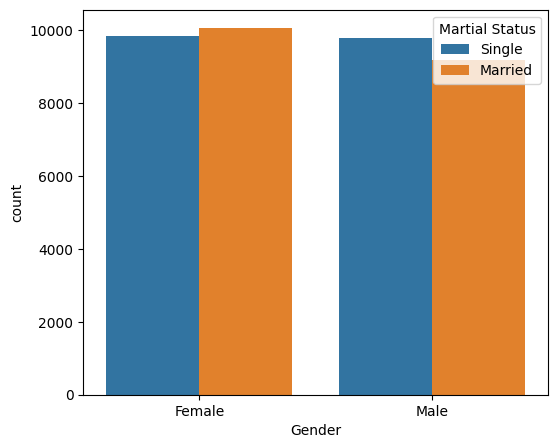

In [9]:
fig = plt.figure(figsize=(6,5))


sns.countplot(data=data,x = data['Gender'] ,hue=data['Martial Status']);

In [10]:
data['Min. Yearly Income'] = data['Min. Yearly Income'].agg(str)

In [11]:
# # fig = plt.figure(figsize=(6,5))
# def income(s):
#     return eval(s.split('K+')[0])

# data['Min. Yearly Income'] = pd.Series([income(i) for i in data['Min. Yearly Income']])

# data.head()

In [12]:
# yearlyIncome = pd.DataFrame(data.groupby('Store Kind')['Min. Yearly Income'].agg(np.mean))

# yearlyIncome

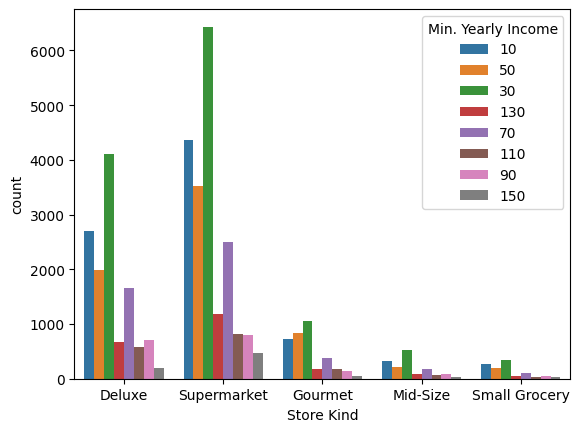

In [13]:
sns.countplot(data=data, x='Store Kind', hue='Min. Yearly Income');

In [14]:
data['Work'].unique()

array(['professional', 'management', 'manual', 'clerical'], dtype=object)

In [15]:
data['Education'].unique()

array(['bachelors', 'high', 'partial', 'graduate'], dtype=object)

In [16]:
len(data["Pre_code"].unique())

19

In [17]:
data.describe()

,No. of Childs,Video,Bar_for_Salad,Ready_food,Coffee,Florist,Store Sales,Store Cost,Net Weight,Gross Weight,Package Weight,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
count,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000
mean,2.528189,0.355423,0.587401,0.587401,0.612898,0.563834,5.319644,2.361672,17.137210,20.063495,2.926287,0.556597,2597.902047,1775.456720,493.520458,328.929246,519.230010
std,1.488913,0.478647,0.492308,0.492308,0.487094,0.495915,3.268782,1.491545,6.551918,6.458746,2.608086,0.496793,503.902217,353.676975,139.137014,92.565663,156.872299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.433500,8.721600,-10.201830,0.000000,1882.700000,1233.080000,227.800000,149.900000,265.631700
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,1.000000,11.570600,14.434200,1.599000,0.000000,2192.250000,1508.000000,440.920000,293.950000,364.269500
50%,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,17.149701,20.032870,2.907200,1.000000,2596.294471,1773.400262,481.980000,321.260000,515.259600
75%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.240000,3.067200,22.530700,25.292500,4.360800,1.000000,2861.130000,2049.720000,523.320000,348.850000,662.222600
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.900000,9.200000,30.234700,31.833700,15.662032,1.000000,7857.550000,8103.200000,1783.640000,570.740000,783.192500


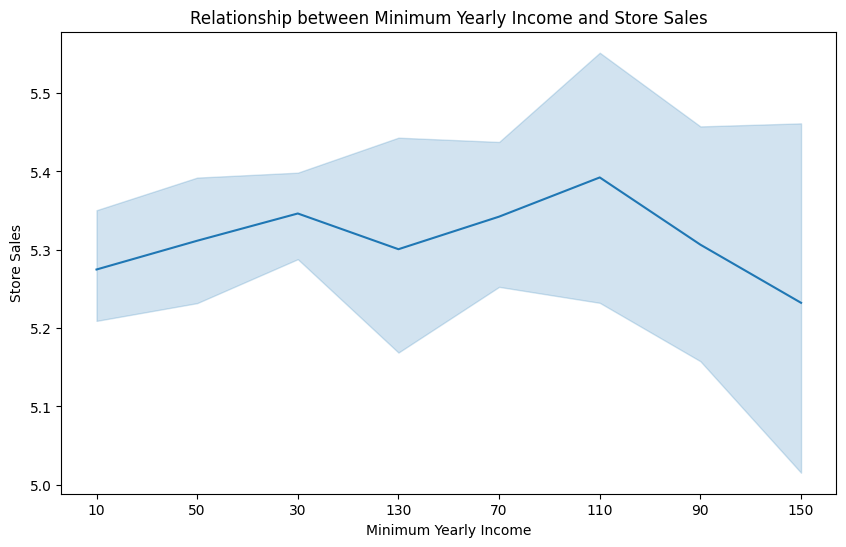

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Min. Yearly Income', y='Store Sales', data=data)
plt.title('Relationship between Minimum Yearly Income and Store Sales')
plt.xlabel('Minimum Yearly Income')
plt.ylabel('Store Sales')
plt.show()

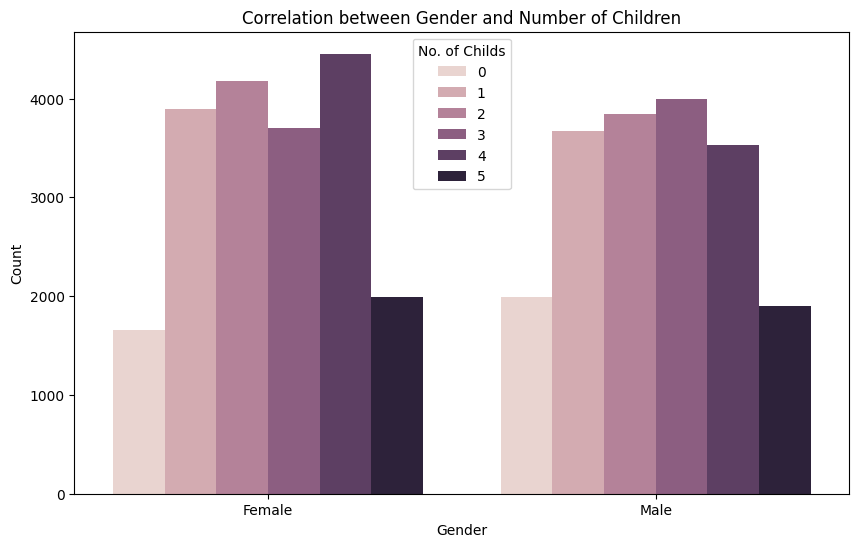

In [19]:
gender_child_count = data.groupby(['Gender', 'No. of Childs']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Count', hue='No. of Childs', data=gender_child_count)
plt.title('Correlation between Gender and Number of Children')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

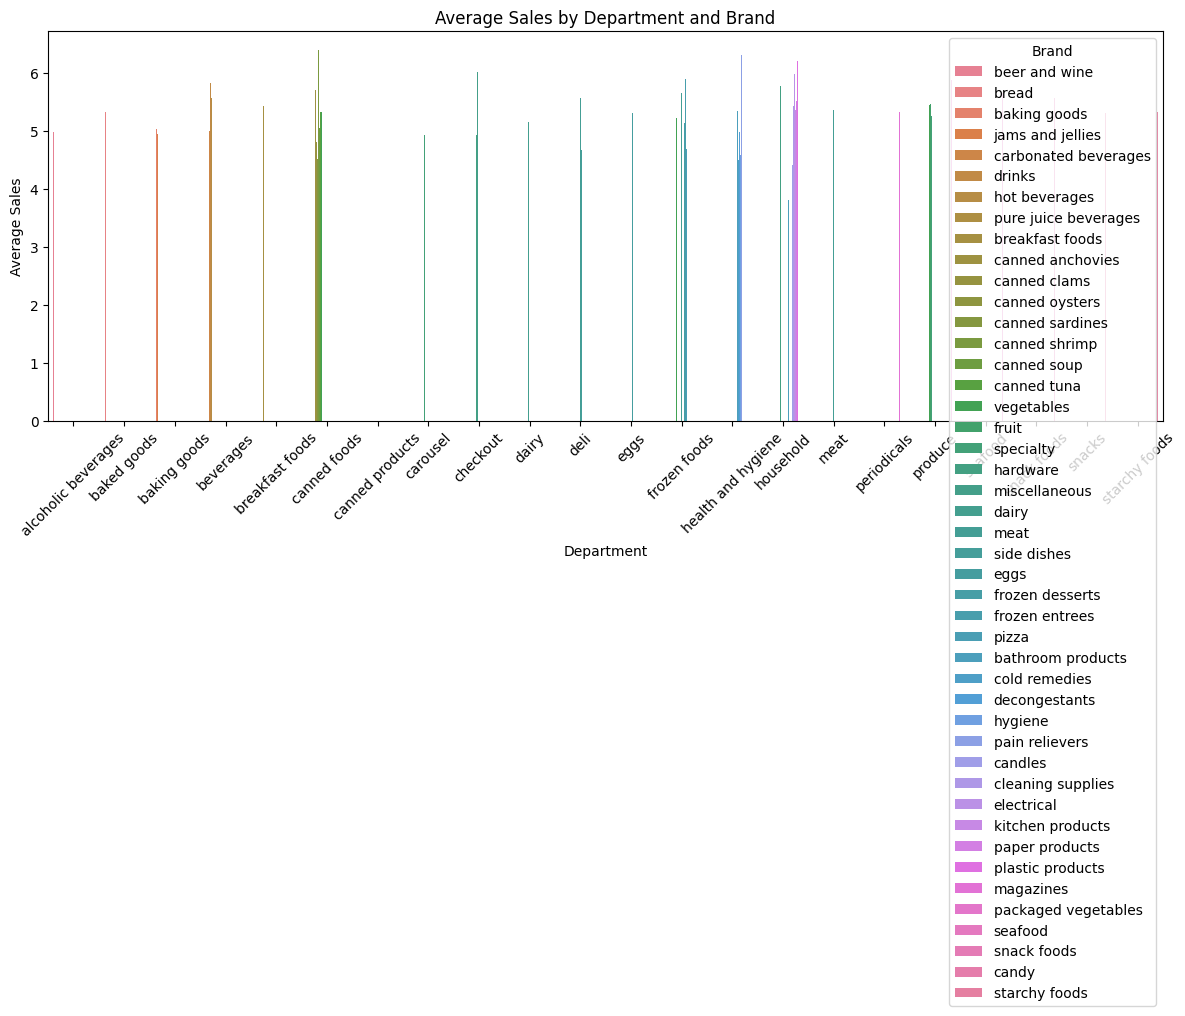

In [20]:
avg_sales_cost_profit = data.groupby(['department', 'item']).agg({'Store Sales': 'mean', 'Store Cost': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='department', y='Store Sales', hue='item', data=avg_sales_cost_profit, ci=None)
plt.title('Average Sales by Department and Brand')
plt.xlabel('Department')
plt.ylabel('Average Sales')
plt.legend(title='Brand', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

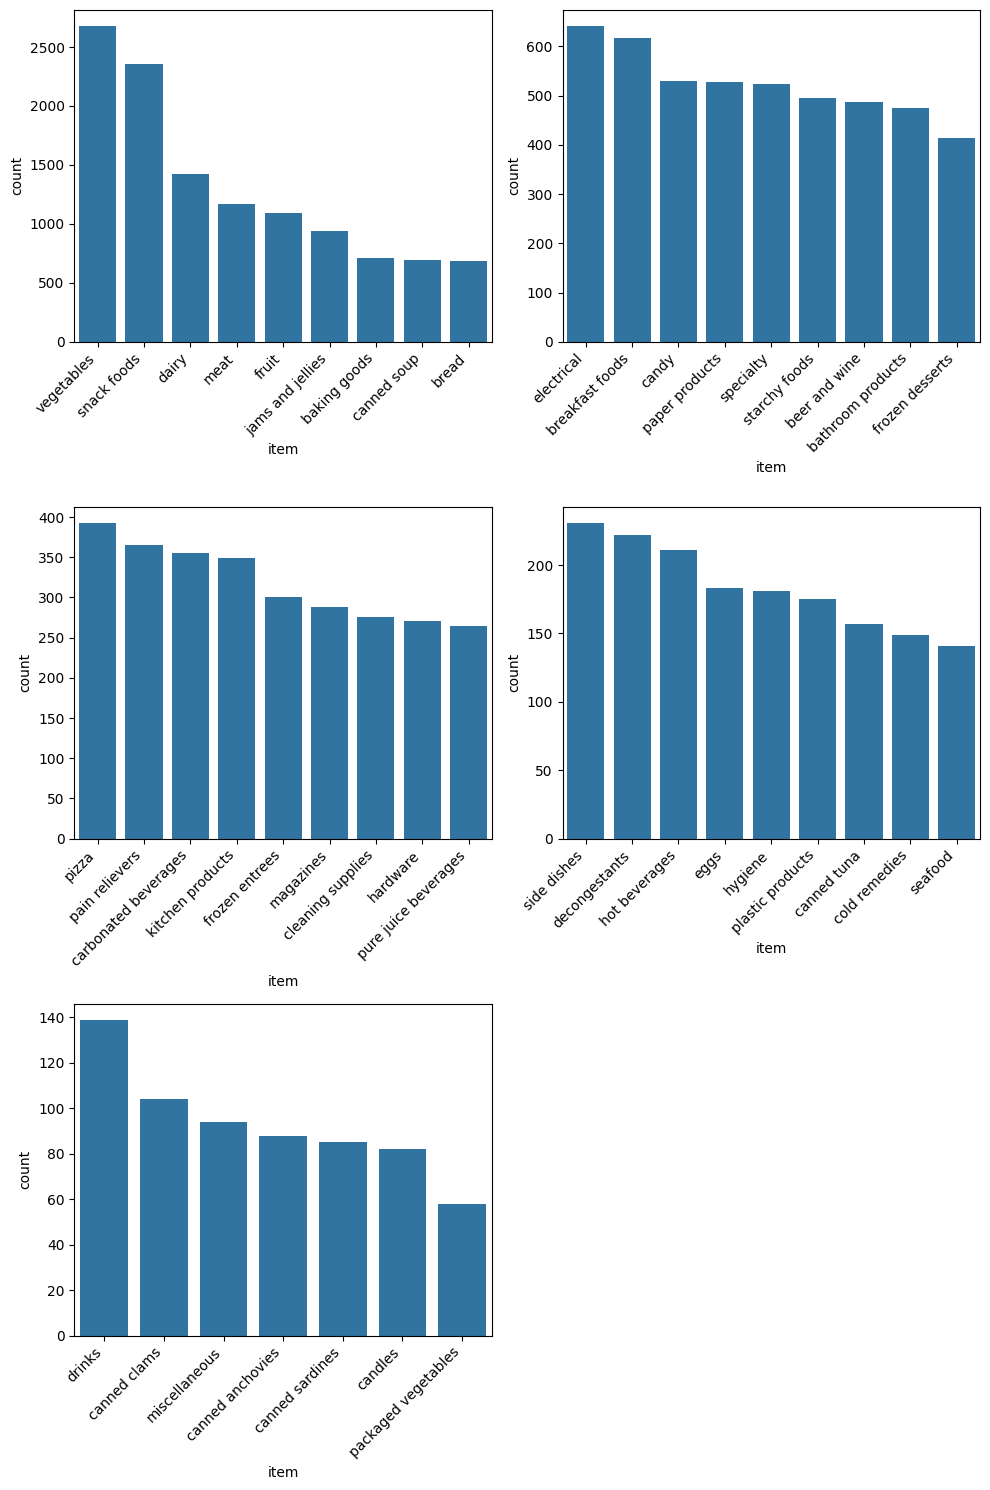

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

x = data[data["Is Recyclable?"] == 1]["item"].value_counts()

num_plots = len(x) // 9 + 1
num_rows = 3
num_cols = (num_plots - 1) // num_rows + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

for i, ax in enumerate(axes.flat):
    start_idx = i * 9
    end_idx = min((i + 1) * 9, len(x))
    if start_idx < len(x):
        sns.barplot(x[start_idx:end_idx], ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        fig.delaxes(ax)  # Remove the last subplot

plt.tight_layout()
plt.show()


In [22]:
len(data["department"].unique())

22

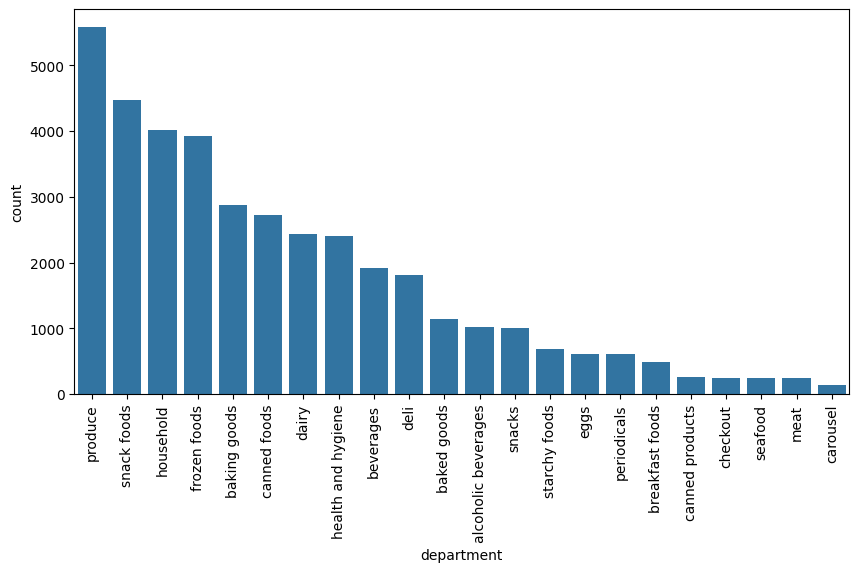

In [23]:
fig = plt.figure(figsize=(10, 5))

sns.barplot(x=data["department"].value_counts().index, y=data["department"].value_counts())
plt.xticks(rotation=90)

plt.show()


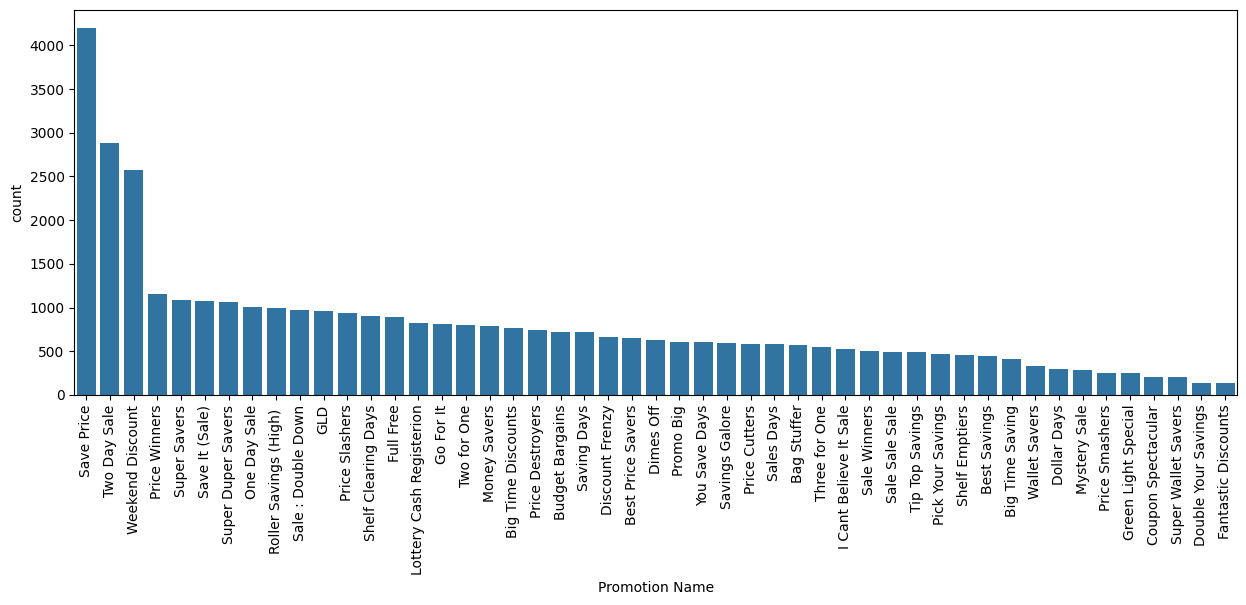

In [24]:
fig = plt.figure(figsize=(15, 5))

sns.barplot(x=data["Promotion Name"].value_counts().index, y=data["Promotion Name"].value_counts())
plt.xticks(rotation=90)

plt.show()


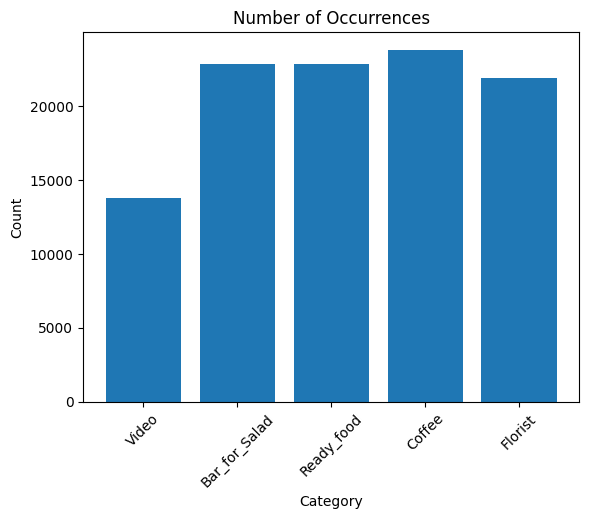

In [25]:
x = { "Video" : len(data[data["Video"] == 1]),
                   "Bar_for_Salad" : len(data[data["Bar_for_Salad"] == 1]),
                   "Ready_food" : len(data[data["Ready_food"] == 1]),
                   "Coffee" : len(data[data["Coffee"] == 1]),
                   "Florist" : len(data[data["Florist"] == 1])
}

labels = list(x.keys())
values = list(x.values())

# Creating bar plot
plt.bar(labels, values)

# Adding title and labels
plt.title('Number of Occurrences')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

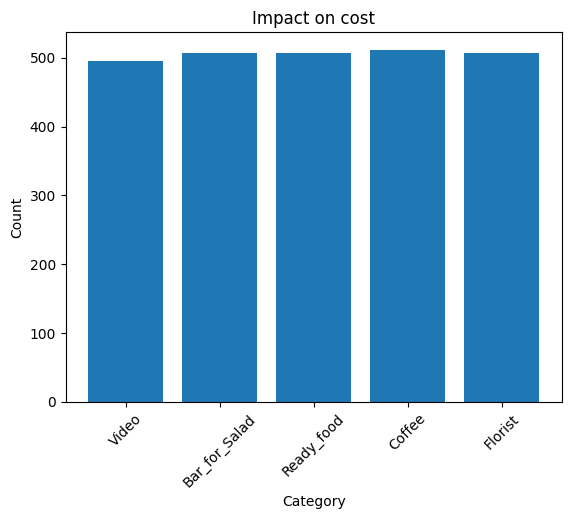

In [26]:
x = {"Video" : data[data["Video"] == 1]["Cost"].agg(np.mean),
    "Bar_for_Salad" : data[data["Bar_for_Salad"] == 1]["Cost"].agg(np.mean),
    "Ready_food" : data[data["Ready_food"] == 1]["Cost"].agg(np.mean),
    "Coffee" : data[data["Coffee"] == 1]["Cost"].agg(np.mean),
    "Florist" : data[data["Florist"] == 1]["Cost"].agg(np.mean)
}
labels = list(x.keys())
values = list(x.values())

# Creating bar plot
plt.bar(labels, values)

# Adding title and labels
plt.title('Impact on cost')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

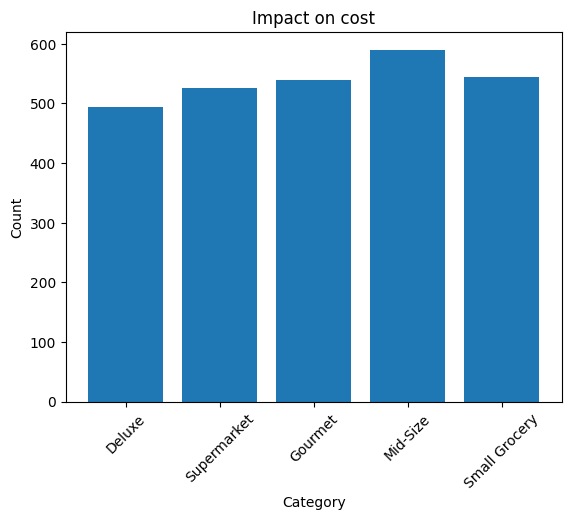

In [27]:
x = {i : data[data["Store Kind"] == i]["Cost"].agg(np.mean) for i in data["Store Kind"].unique()}

labels = list(x.keys())
values = list(x.values())

# Creating bar plot
plt.bar(labels, values)

# Adding title and labels
plt.title('Impact on cost')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [33]:
data["Gross Weight"].head()

0    28.1997
1    16.5710
2    28.6358
3    14.2161
4    12.6172
Name: Gross Weight, dtype: float64

In [42]:
data["Net Weight"].max()

30.2347

In [36]:
data["Package Weight"].head()

0    1.5990
1    1.5990
2    1.4536
3    2.9217
4    2.9072
Name: Package Weight, dtype: float64

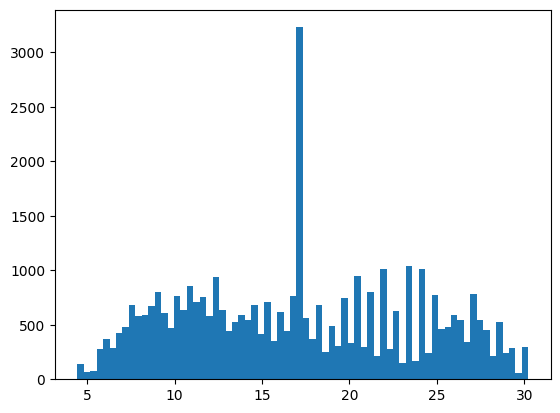

In [47]:
plt.hist(data["Net Weight"], bins=70)
plt.show()

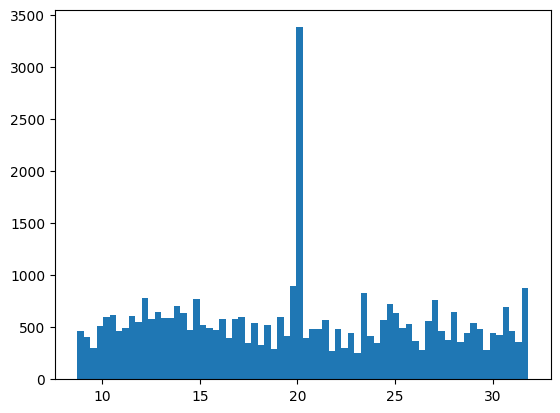

In [49]:
plt.hist(data["Gross Weight"], bins=70)
plt.show()

In [54]:
len(data[data["Package Weight"] < 0]["Package Weight"])

1920

In [57]:
len(data[data["No. of Childs"] < 0])

0